## Goal of this Notebook  
- Perform EDA on the given Dataset and provide concise summary of your exploration  
- Visualize distributions and provide concise summary

## Step 1: Loan Libraries and Data
Setup to accomplish the task

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import kagglehub as kh

/Users/vijaypatha/Developer/ML_LLM/Regression/BankChurners/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kh.dataset_download("sakshigoyal7/credit-card-customers")
df = pd.read_csv(path + "/BankChurners.csv") 
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


## Step 2: Exploratory Data Analysis (EDA) 
Prepare a refined dataset for further analysis, such as applying machine learning models or large language models

In [3]:
print(f"Rows and Columns of DataFrame: {df.shape}\n")
print(f"Additional Information of DataFrame: \n")
df.info()

Rows and Columns of DataFrame: (10127, 23)

Additional Information of DataFrame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3 

In [4]:
df.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2","CLIENTNUM"], inplace=True)

In [5]:
df.select_dtypes(include='number').agg(['min','max','mean','std'])

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691


In [6]:
# What are the unique values in catgroical columms
df.select_dtypes(include='object').agg(['unique'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
unique,"[Existing Customer, Attrited Customer]","[M, F]","[High School, Graduate, Uneducated, Unknown, C...","[Married, Single, Unknown, Divorced]","[$60K - $80K, Less than $40K, $80K - $120K, $4...","[Blue, Gold, Silver, Platinum]"


In [7]:
#how many "unknows" are there
df[(df["Marital_Status"]=="Unknown") | (df["Education_Level"]=="Unknown") | (df["Income_Category"]=="Unknown")].shape

(3046, 20)

In [8]:
# drop rows with unknown values
# drop_unknowns = df[(df["Marital_Status"]=="Unknown") | (df["Education_Level"]=="Unknown") | (df["Income_Category"]=="Unknown")].index
# df.drop(drop_unknowns, inplace=True)

In [9]:
# print(df["Marital_Status"].unique())
# print(df["Education_Level"].unique())
# print(df["Income_Category"].unique())

In [10]:
# Quantifying the skewness of the numerical columns 
df.select_dtypes(include='number').skew()

Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

### EDA Observations
- 23 Features, 10127 Observations (rows)
- Attrition_Flag is the target variable: [Existing Customer, Attrited Customer]
- No Nulls but there 3046 observations with unknown education_level, marital_status, and Income_category.
- Dropped 3 columns 
- 0.5 to 1 Moderately skewed: Months_Inactive_12_mon, Avg_Utilization_Ratio
- 1 and above are highliy skewed: Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1

## Step 3. Visualizations
Visualizing distributions, outliers, and patterns in raw data, prior to transformations

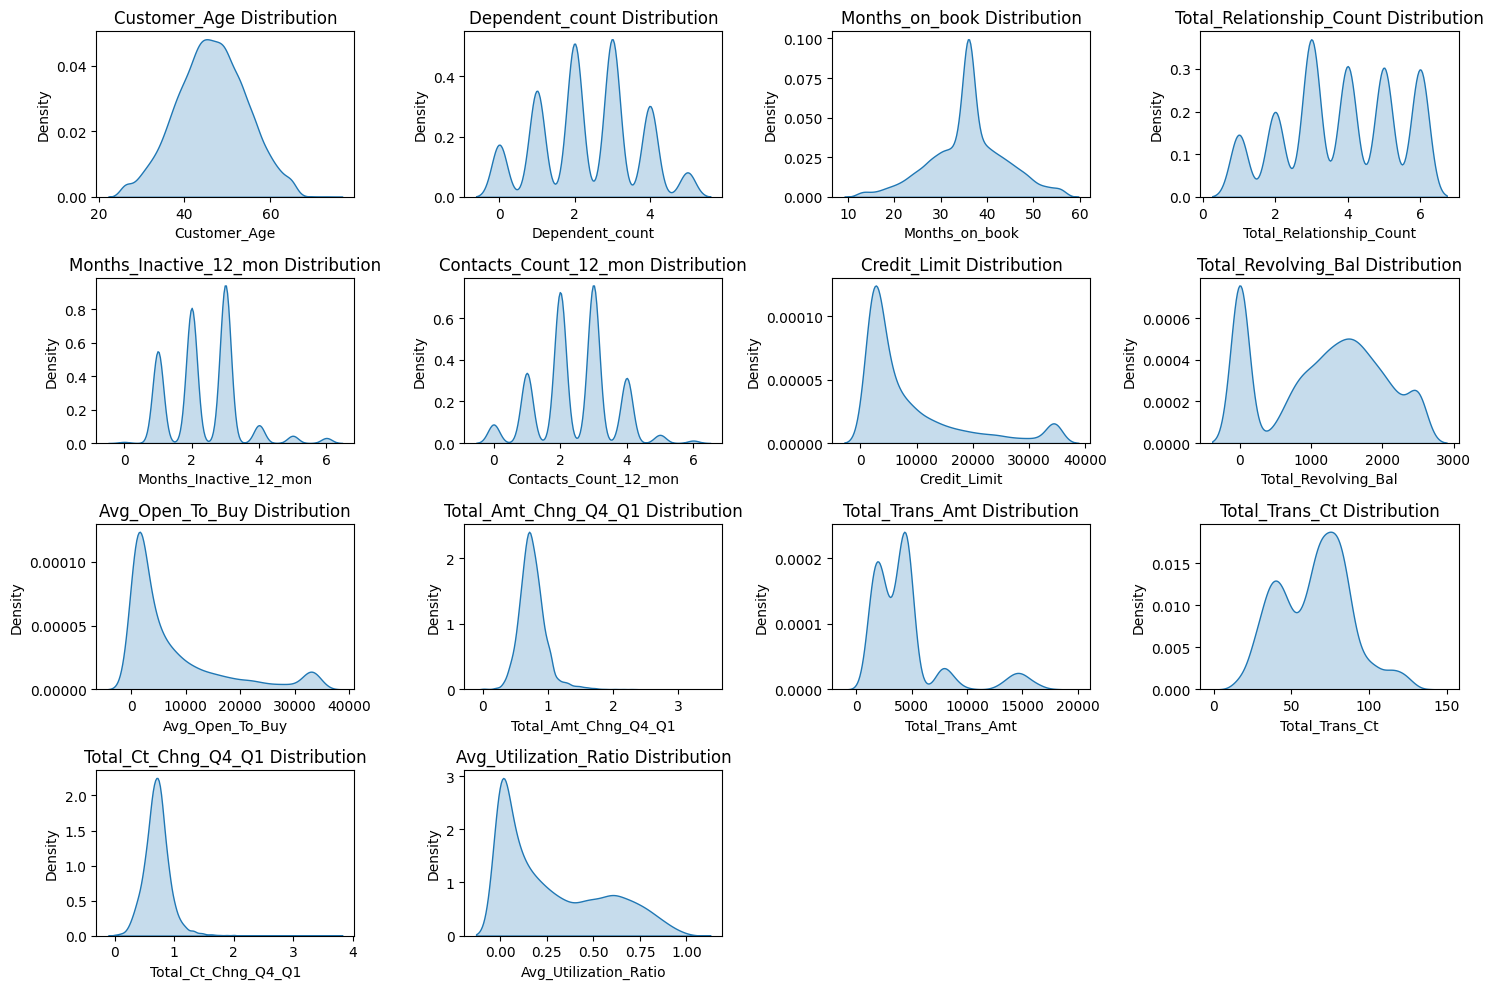

In [11]:
plt.figure(figsize=(15,10)) # container for the plot 

numerical_columns = df.select_dtypes(include='number').columns

for idx, col in enumerate(numerical_columns, start=1) : # get both the index (`idx`) and column name (`col`) while iterating. The index is passed to `plt.subplot()` as the position.
    # The `start=1` parameter in the `enumerate()` function is used to make the index (`idx`) start from 1 instead of the default value of 0 because plt.subplot has only index of 1
    plt.subplot(4,4,idx)
    sns.kdeplot(df[col], fill=True)
    plt.title(f"{col} Distribution")

plt.tight_layout()


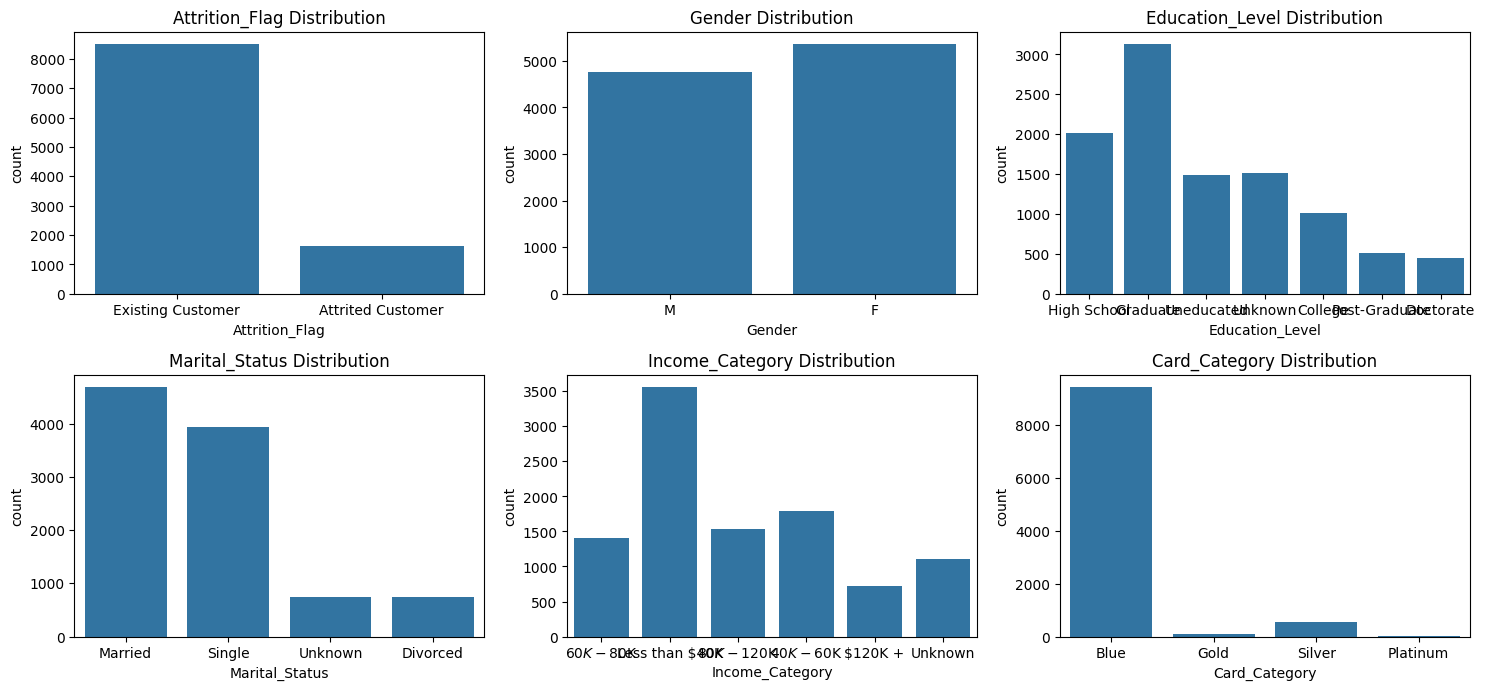

In [12]:
plt.figure(figsize=(15,10))
categorical_columns = df.select_dtypes(include='object').columns

for idx, col in enumerate(categorical_columns, start=1):
    plt.subplot(3,3,idx)
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Distribution")

plt.tight_layout()


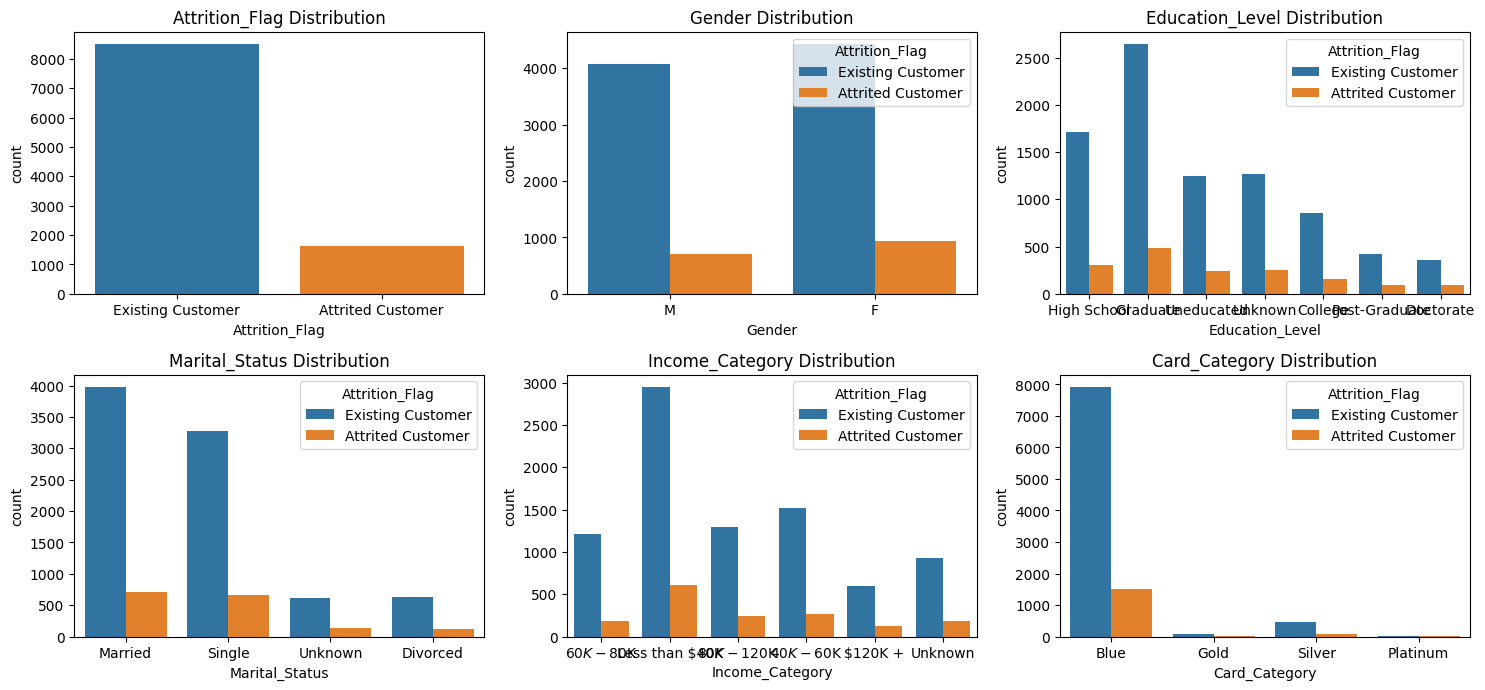

In [13]:
plt.figure(figsize=(15,10))

for idx, col in enumerate(categorical_columns, start=1):
    plt.subplot(3,3,idx)
    sns.countplot(data=df, x=col, hue='Attrition_Flag')
    plt.title(f"{col} Distribution")
plt.tight_layout()

### Visualization Observations 
- Highly skewed data, Bi-modal, Milti Modal data 
- A lot of unknows Marital Stauts, Income Category, and Education level. ~30% of rows has atleast one unknown. 

## Step 4: Data Cleaning

In [14]:
df["Education_Level"].replace("Unknown", df["Education_Level"].mode()[0], inplace=True)
df["Marital_Status"].replace("Unknown", df["Marital_Status"].mode()[0], inplace=True)
df["Income_Category"].replace("Unknown", df["Income_Category"].mode()[0], inplace=True)

/var/folders/tn/bllk4s_n0k9g75m59d6nyp8w0000gn/T/ipykernel_5138/2881716271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Education_Level"].replace("Unknown", df["Education_Level"].mode()[0], inplace=True)
/var/folders/tn/bllk4s_n0k9g75m59d6nyp8w0000gn/T/ipykernel_5138/2881716271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate objec

## Step 5: Feature engineering
- Creating interaction terms between variables.
- Normalizing or scaling data.
- Encoding categorical variables (e.g., one-hot encoding).

In [15]:
# Customer Behavior Features
df['Account_Tenure_Years'] = df['Months_on_book'] / 12
df['Activity_Ratio'] = df['Total_Trans_Ct'] / df['Months_on_book']
df['Inactivity_Ratio'] = df['Months_Inactive_12_mon'] / df['Months_on_book']
df['Contact_Frequency'] = df['Contacts_Count_12_mon'] / df['Months_on_book']

# Credit Utilization Features
df['Credit_Utilization_Percentage'] = df['Total_Revolving_Bal'] / df['Credit_Limit']
df['Unused_Credit_Percentage'] = df['Avg_Open_To_Buy'] / df['Credit_Limit']
df['Revolving_Balance_Ratio'] = df['Total_Revolving_Bal'] / (df['Avg_Open_To_Buy'] + 1e-9)  # Avoid division by zero

# Transaction Features
df['Avg_Transaction_Amt'] = df['Total_Trans_Amt'] / (df['Total_Trans_Ct'] + 1e-9)  # Avoid division by zero
df['Transaction_Change_Ratio'] = df['Total_Ct_Chng_Q4_Q1'] / (df['Total_Trans_Ct'] + 1e-9)  # Avoid division by zero
df['Spending_Change_Ratio'] = df['Total_Amt_Chng_Q4_Q1'] / (df['Total_Trans_Amt'] + 1e-9)  # Avoid division by zero

# Customer Demographics Features
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels)

df['Dependent_Ratio'] = df['Dependent_count'] / (df['Customer_Age'] + 1e-9)  # Avoid division by zero

# Risk or Loyalty Features
df['Loyalty_Score'] = (df['Months_on_book'] * df['Total_Trans_Ct']) / (df['Months_Inactive_12_mon'] + 1)
df['Risk_Score'] = df['Credit_Utilization_Percentage'] * df['Months_Inactive_12_mon']
df['Transaction_to_Tenure_Ratio'] = df['Total_Trans_Ct'] / (df['Months_on_book'])
df['Spending_to_Limit_Ratio'] = df['Total_Trans_Amt'] / (df['Credit_Limit'])

In [16]:
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Revolving_Balance_Ratio,Avg_Transaction_Amt,Transaction_Change_Ratio,Spending_Change_Ratio,Age_Group,Dependent_Ratio,Loyalty_Score,Risk_Score,Transaction_to_Tenure_Ratio,Spending_to_Limit_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,0.065217,27.238095,0.038690,0.001167,40-50,0.066667,819.0,0.061224,1.076923,0.090143
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,0.116883,39.121212,0.112545,0.001194,40-50,0.102041,726.0,0.104651,0.750000,0.156371
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0.000000,94.350000,0.116650,0.001375,50-60,0.058824,360.0,0.000000,0.555556,0.552077


## Step 6: One Hot Encoding and Encoding
nomial and ordinal features

In [17]:
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status', 'Card_Category', 'Dependent_count','Age_Group'], drop_first=True)

In [18]:
df.head(3)

,Attrition_Flag,Customer_Age,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Card_Category_Silver,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Age_Group_30-40,Age_Group_40-50,Age_Group_50-60,Age_Group_60+
0,Existing Customer,45,High School,$60K - $80K,39,5,1,3,12691.0,777,...,False,False,False,True,False,False,False,True,False,False
1,Existing Customer,49,Graduate,Less than $40K,44,6,1,2,8256.0,864,...,False,False,False,False,False,True,False,True,False,False
2,Existing Customer,51,Graduate,$80K - $120K,36,4,1,0,3418.0,0,...,False,False,False,True,False,False,False,False,True,False


In [19]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Education_Level', 'Income_Category']

# Apply Label Encoding to each specified column
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

# Verify the changes
print(df[columns_to_encode].head())


   Education_Level  Income_Category
0                3                2
1                2                4
2                2                3
3                3                4
4                5                2


In [20]:
df.head(3)

,Attrition_Flag,Customer_Age,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Card_Category_Silver,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Age_Group_30-40,Age_Group_40-50,Age_Group_50-60,Age_Group_60+
0,Existing Customer,45,3,2,39,5,1,3,12691.0,777,...,False,False,False,True,False,False,False,True,False,False
1,Existing Customer,49,2,4,44,6,1,2,8256.0,864,...,False,False,False,False,False,True,False,True,False,False
2,Existing Customer,51,2,3,36,4,1,0,3418.0,0,...,False,False,False,True,False,False,False,False,True,False


## Step 7: Handel Skewness 

In [21]:
# Quantifying the skewness of the numerical columns 
skewness_dict = df.select_dtypes(include='number').skew()

highly_skewed_features = {feature: skew for feature, skew in skewness_dict.items() if abs(skew) > 0.5}

# Print the results
print("Features with skewness > 0.5:")
for feature, skew in highly_skewed_features.items():
    print(f"{feature}: {skew}")

Features with skewness > 0.5:
Income_Category: -0.6217263414440269
Months_Inactive_12_mon: 0.6330611289713137
Credit_Limit: 1.666725807993647
Avg_Open_To_Buy: 1.6616965459311595
Total_Amt_Chng_Q4_Q1: 1.7320634114286038
Total_Trans_Amt: 2.0410034025756936
Total_Ct_Chng_Q4_Q1: 2.0640305679077477
Avg_Utilization_Ratio: 0.7180079967731994
Activity_Ratio: 1.4422074043483497
Inactivity_Ratio: 1.3900883547141718
Contact_Frequency: 1.3165206398552918
Credit_Utilization_Percentage: 0.7179963596136129
Unused_Credit_Percentage: -0.7179963596136115
Revolving_Balance_Ratio: 73.91480921989057
Avg_Transaction_Amt: 1.8831637266907417
Transaction_Change_Ratio: 6.285257469918394
Spending_Change_Ratio: 2.541779615938381
Loyalty_Score: 1.3185080345676934
Risk_Score: 1.6295964052284977
Transaction_to_Tenure_Ratio: 1.4422074043483497
Spending_to_Limit_Ratio: 1.269587895934795


In [22]:
# If you want to get just the list of feature names
high_skew_feature_names = list(highly_skewed_features.keys())
print("\nList of high skew features:", high_skew_feature_names)


List of high skew features: ['Income_Category', 'Months_Inactive_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Activity_Ratio', 'Inactivity_Ratio', 'Contact_Frequency', 'Credit_Utilization_Percentage', 'Unused_Credit_Percentage', 'Revolving_Balance_Ratio', 'Avg_Transaction_Amt', 'Transaction_Change_Ratio', 'Spending_Change_Ratio', 'Loyalty_Score', 'Risk_Score', 'Transaction_to_Tenure_Ratio', 'Spending_to_Limit_Ratio']


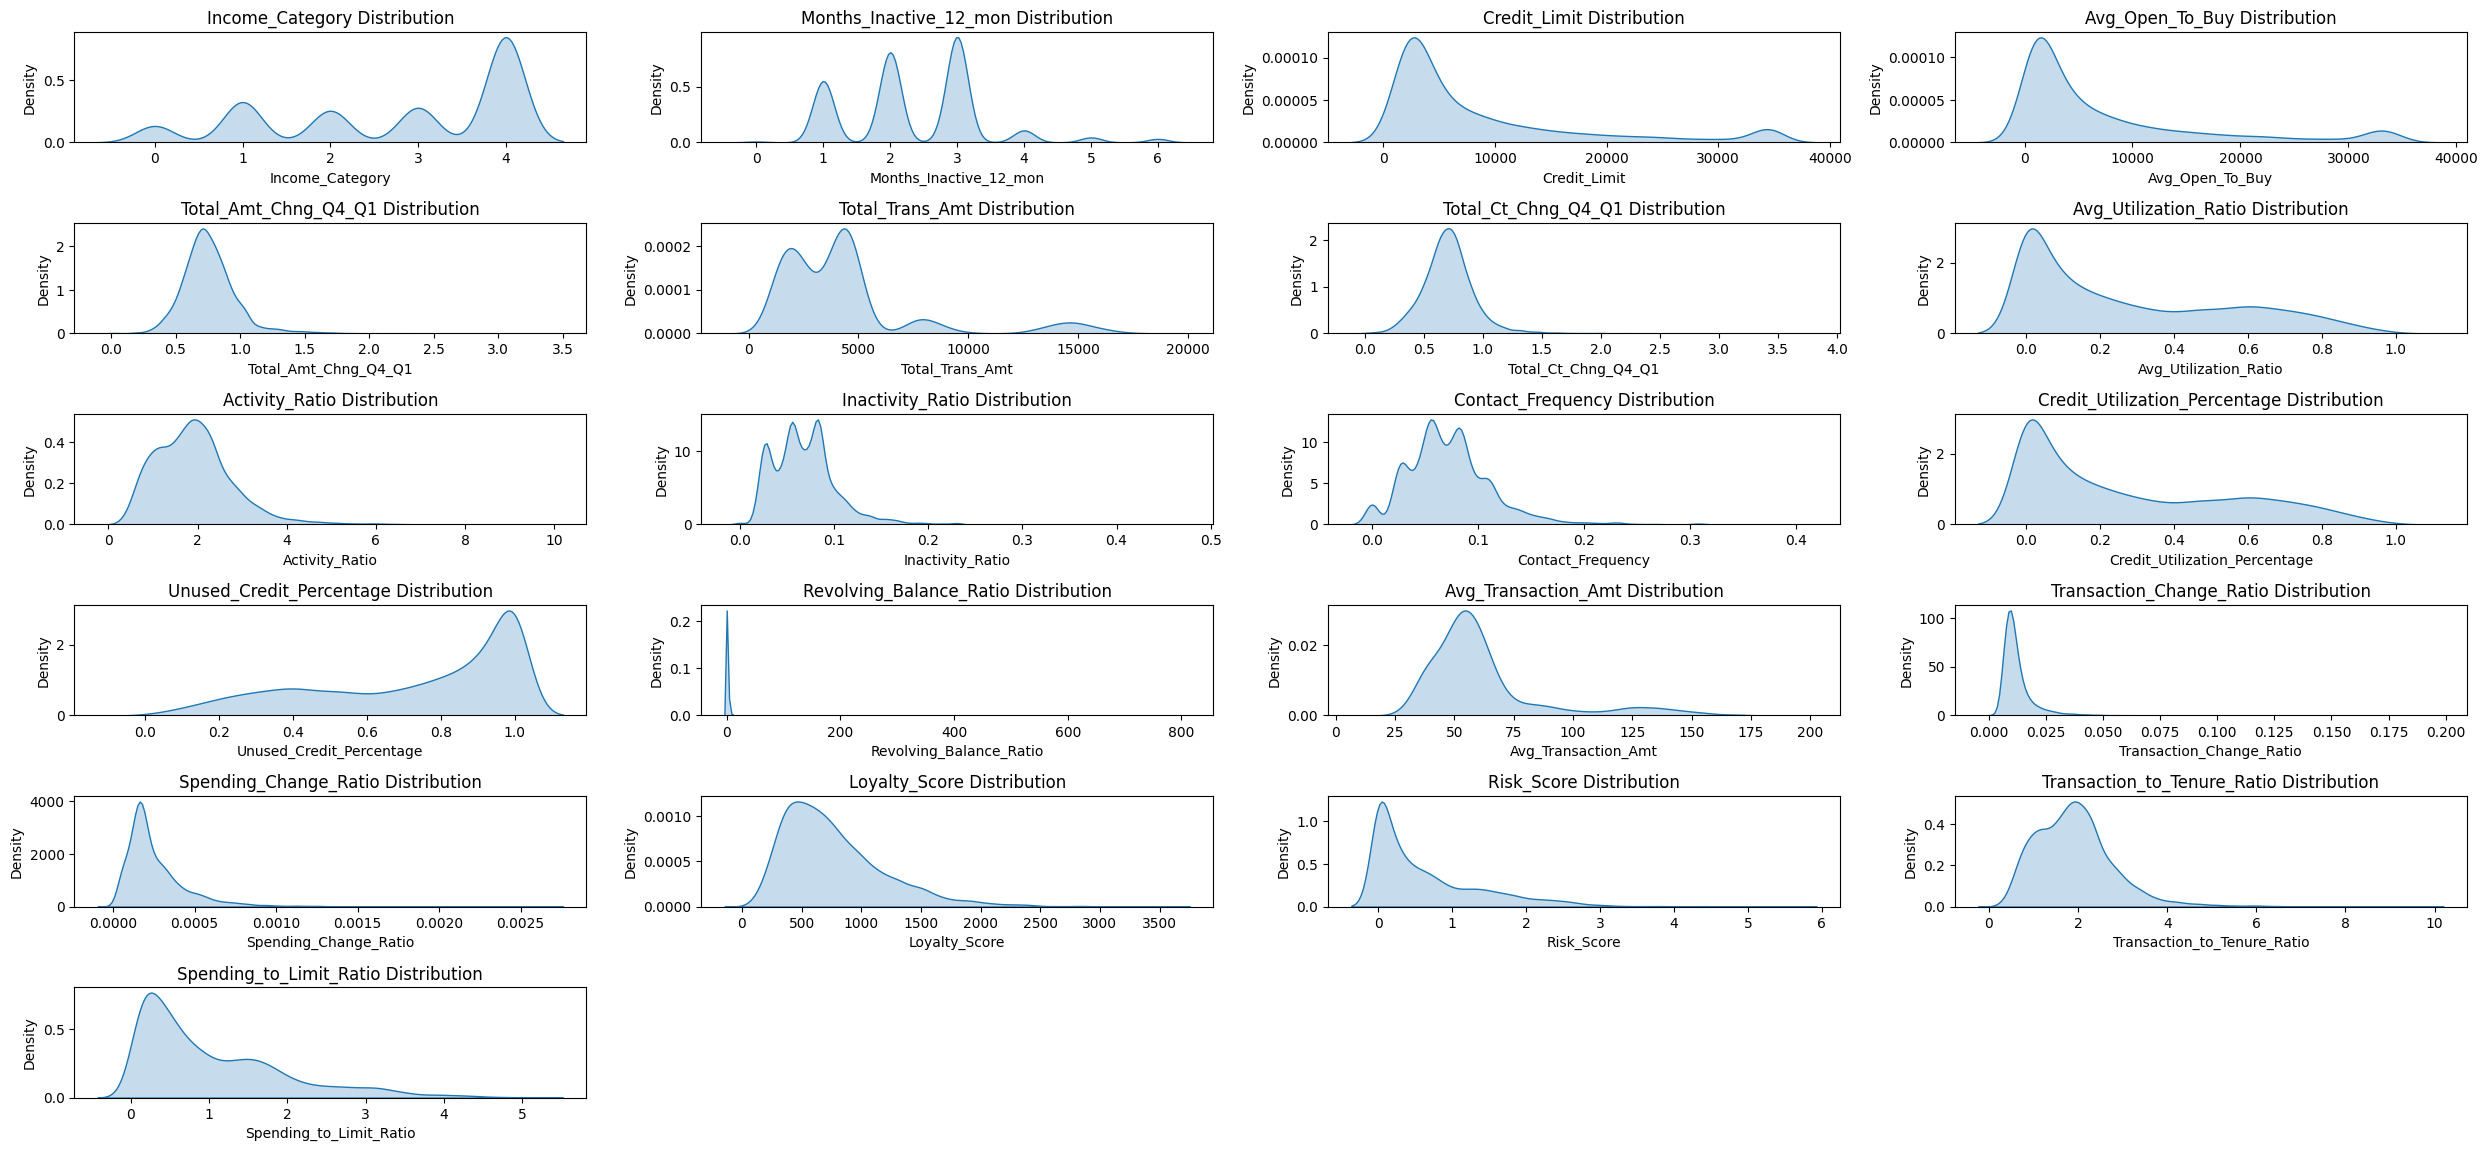

In [23]:

plt.figure(figsize=(25,15))

for idx, col in enumerate(high_skew_feature_names, start=1):
    plt.subplot(8,4,idx)
    sns.kdeplot(df[col], fill=True)
    plt.title(f"{col} Distribution")
plt.tight_layout()

In [24]:
# 3. Apply transformations

from scipy.stats import boxcox


for feature in high_skew_feature_names:
    # Log transform
    df[feature + '_Log'] = np.log1p(df[feature])

    # Box-Cox (handling potential non-positive values)
    if (df[feature] <= 0).any():
        df[feature + '_BoxCox'], _ = boxcox(df[feature] + 1)
    else:
        df[feature + '_BoxCox'], _ = boxcox(df[feature])


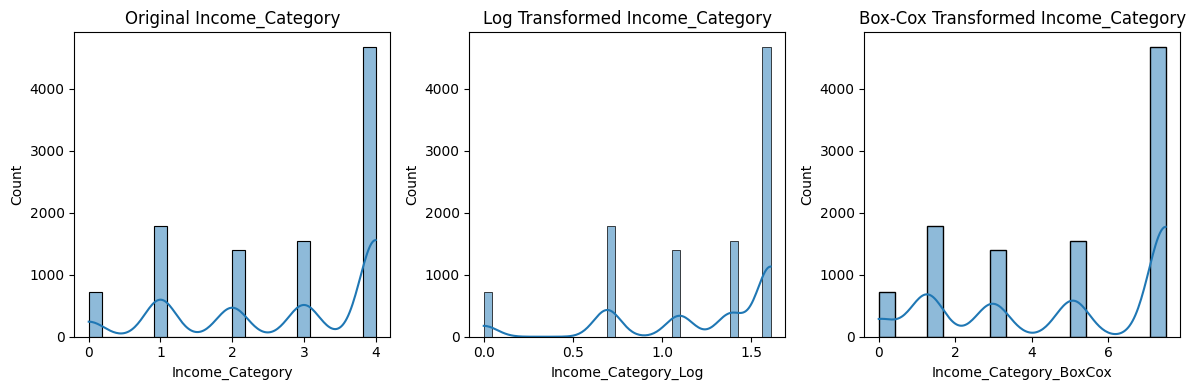

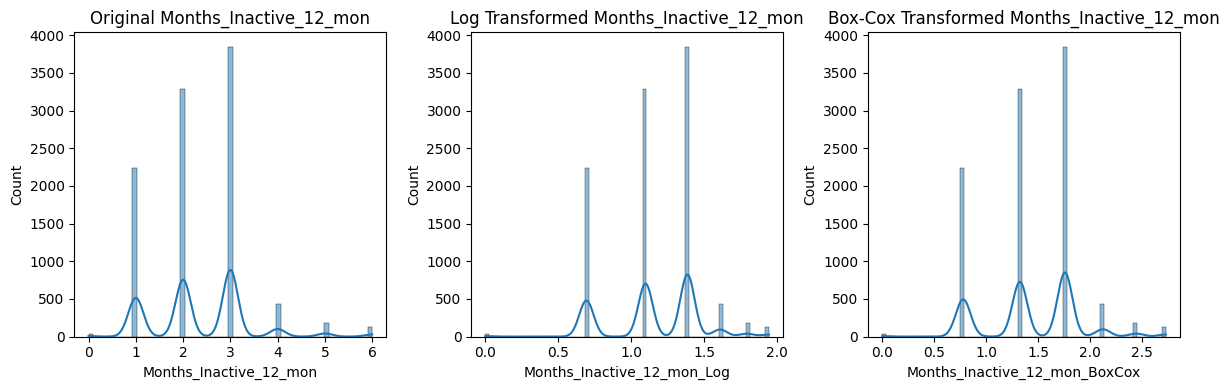

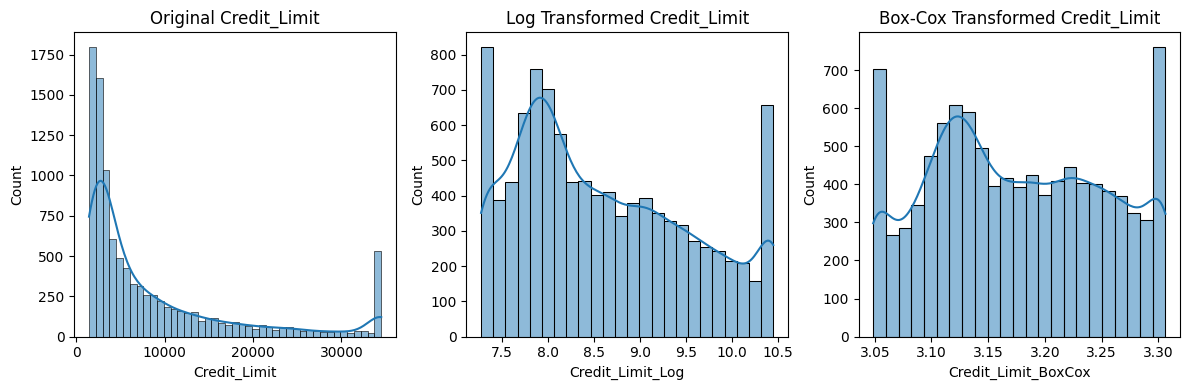

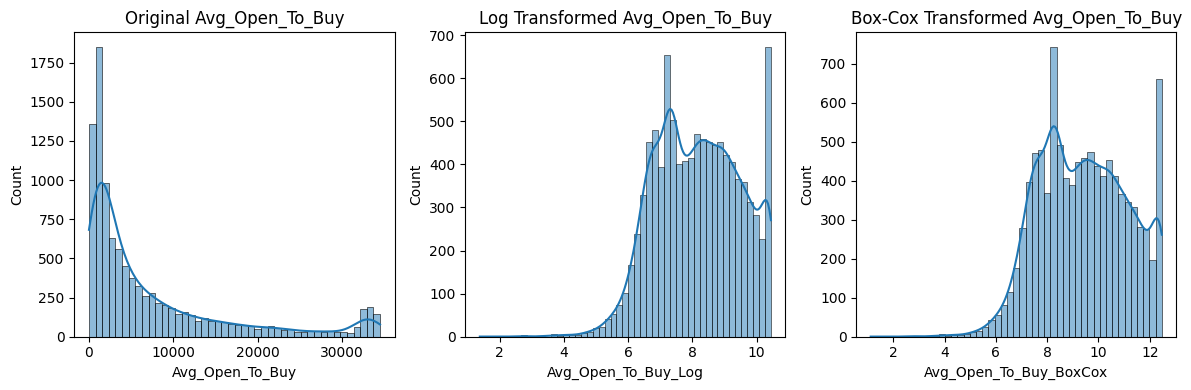

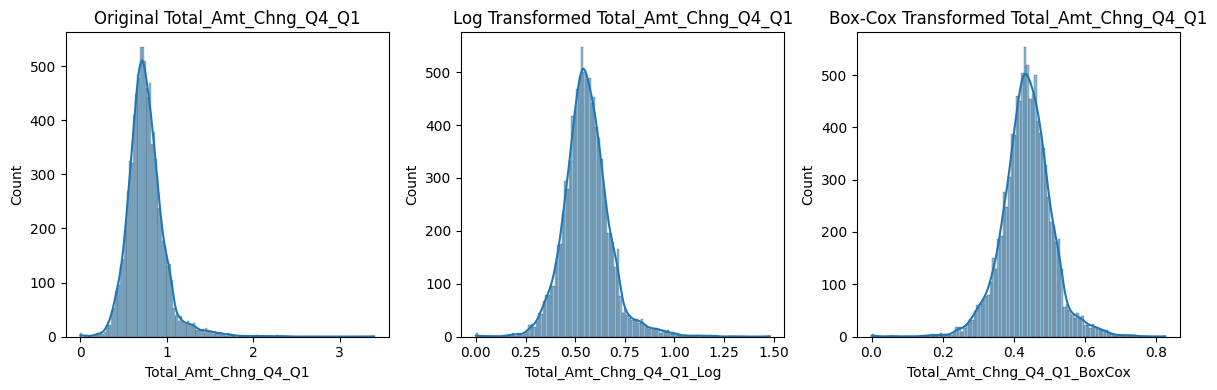

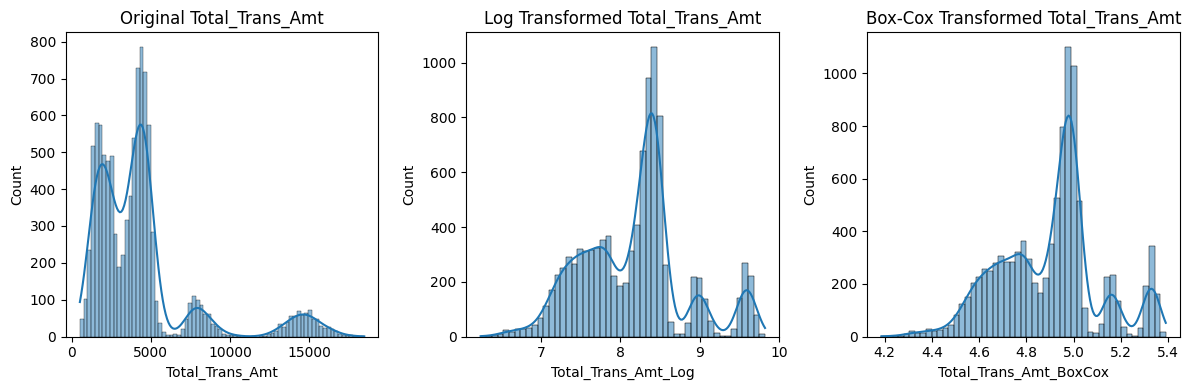

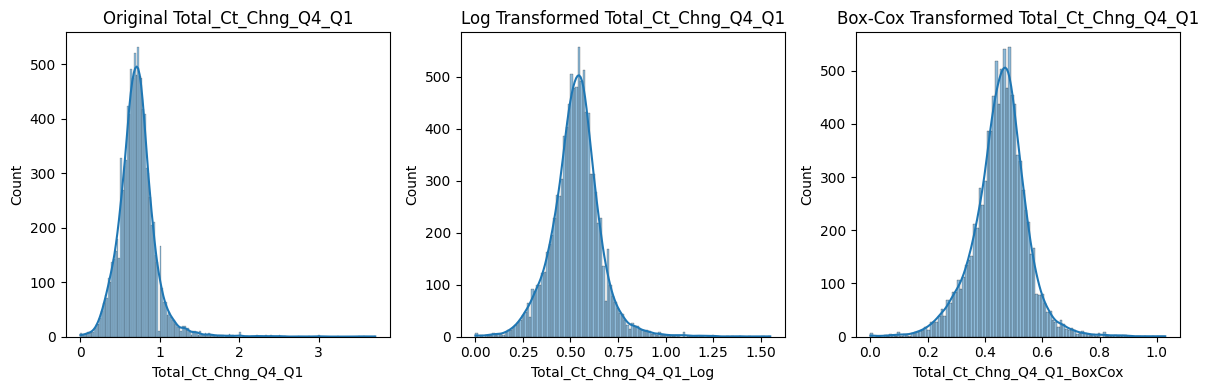

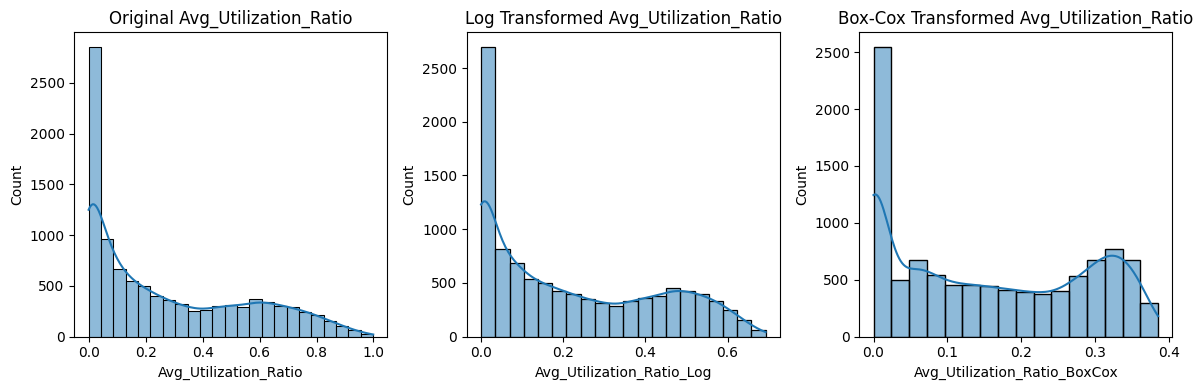

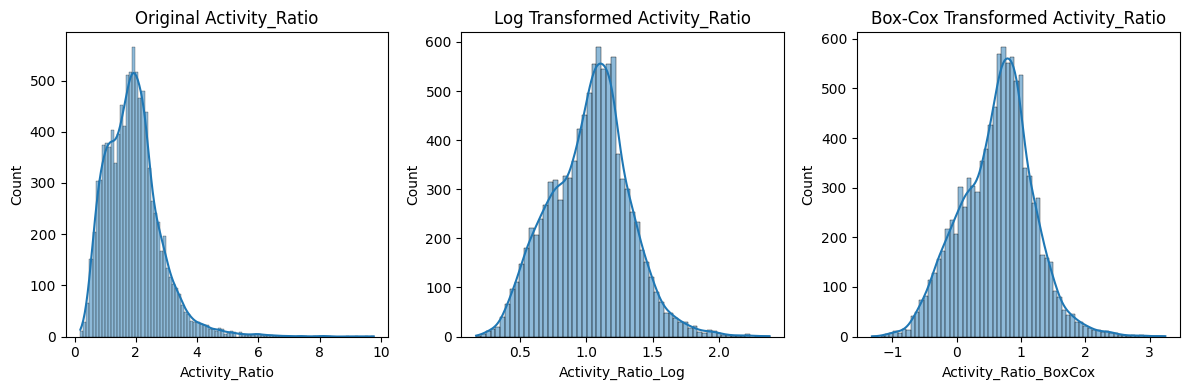

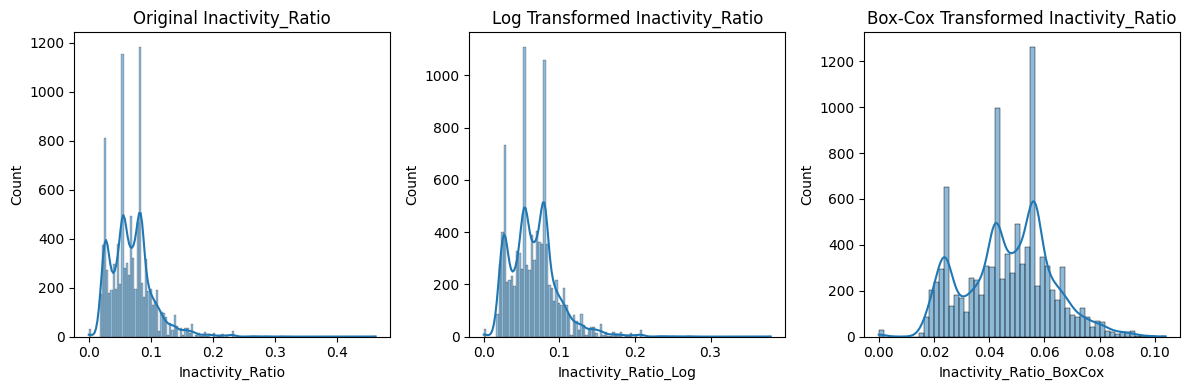

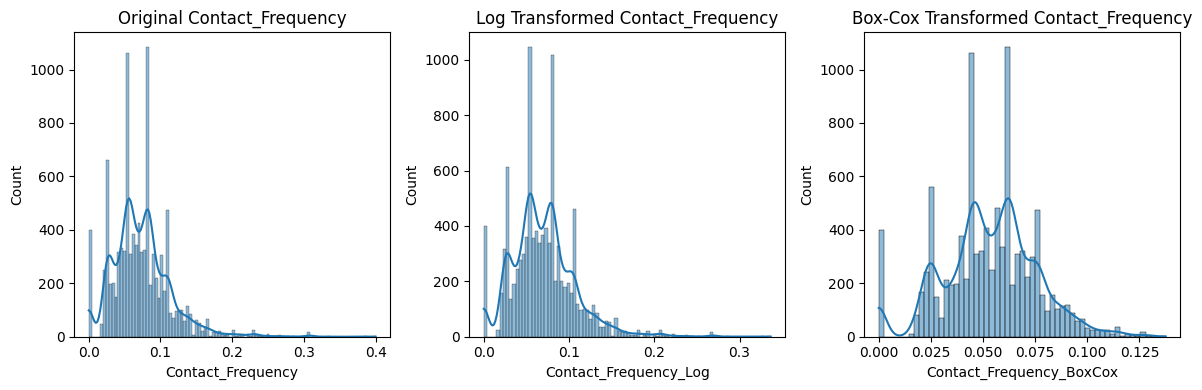

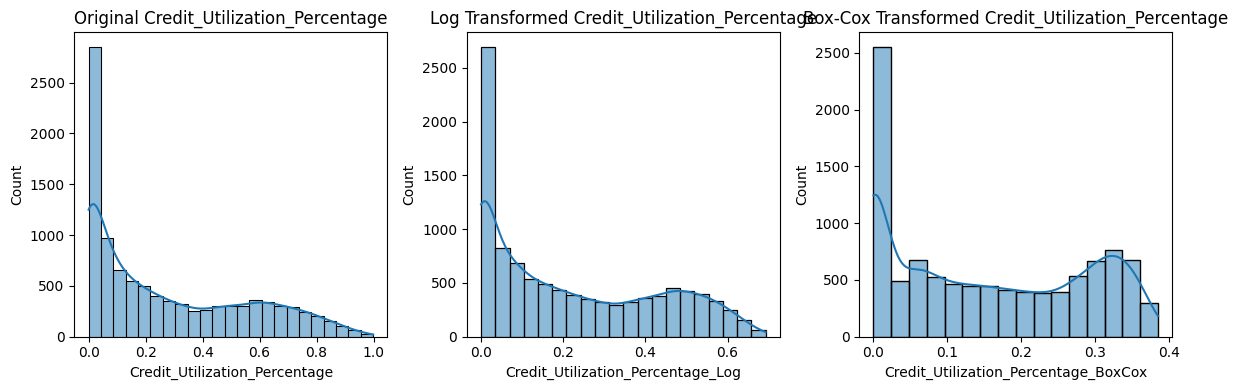

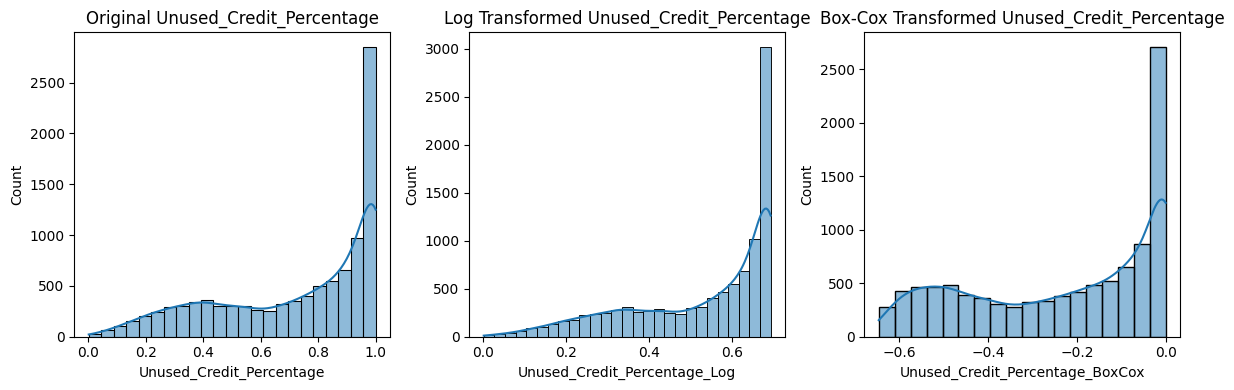

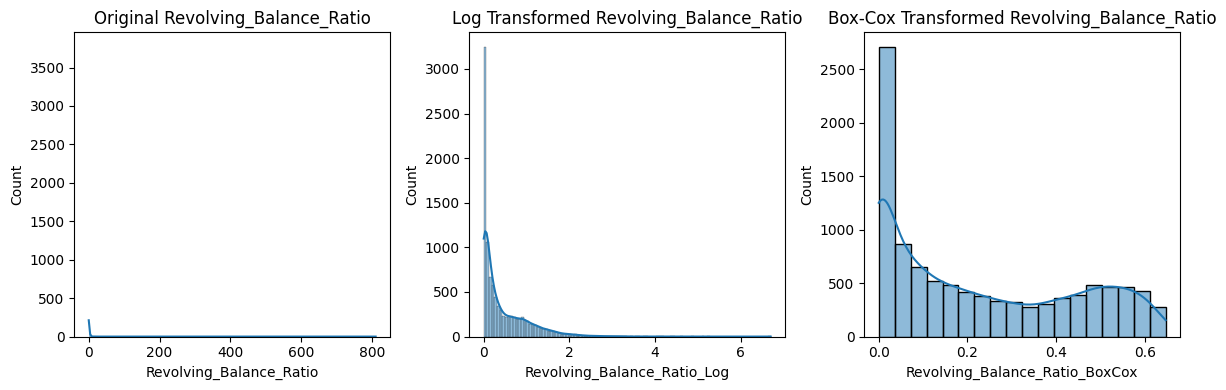

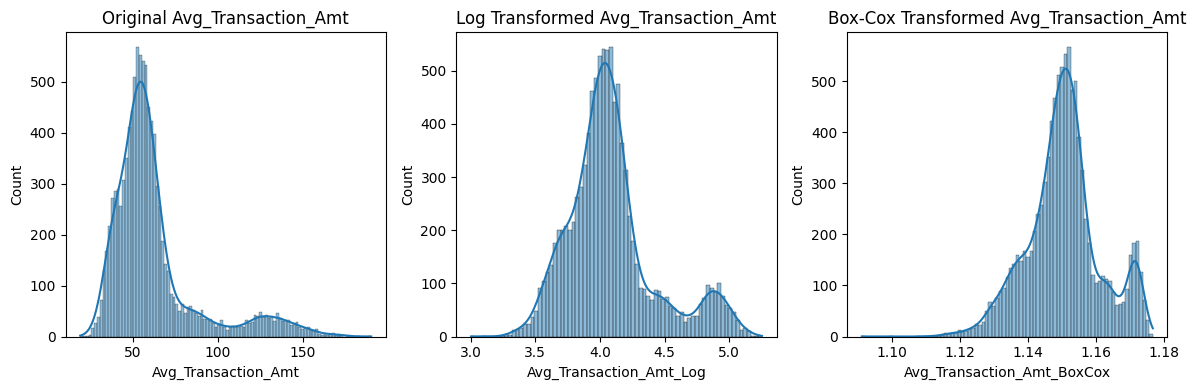

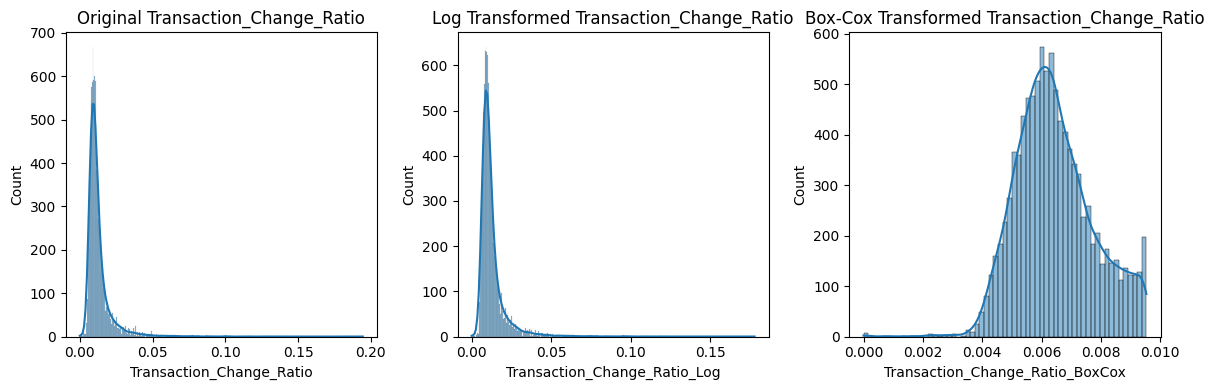

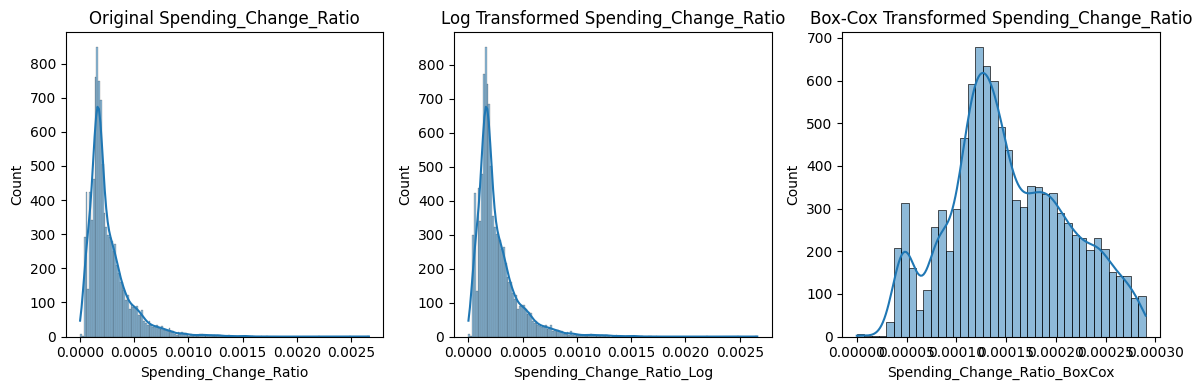

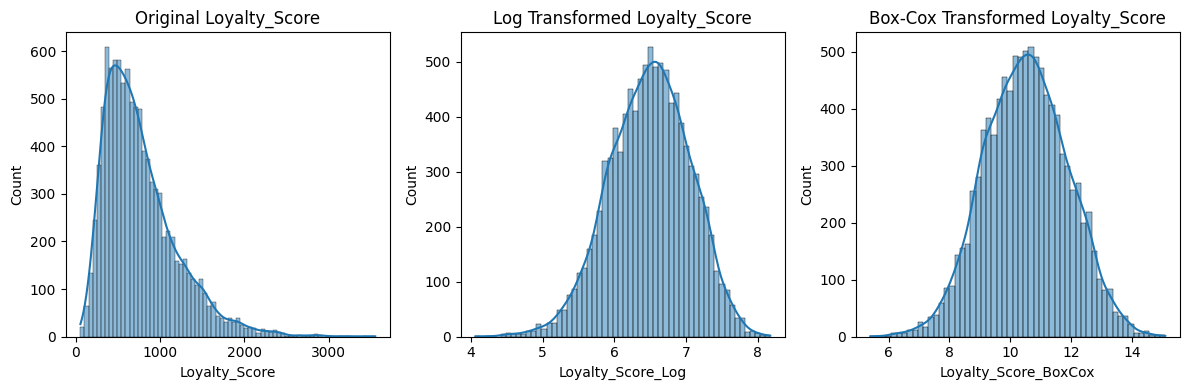

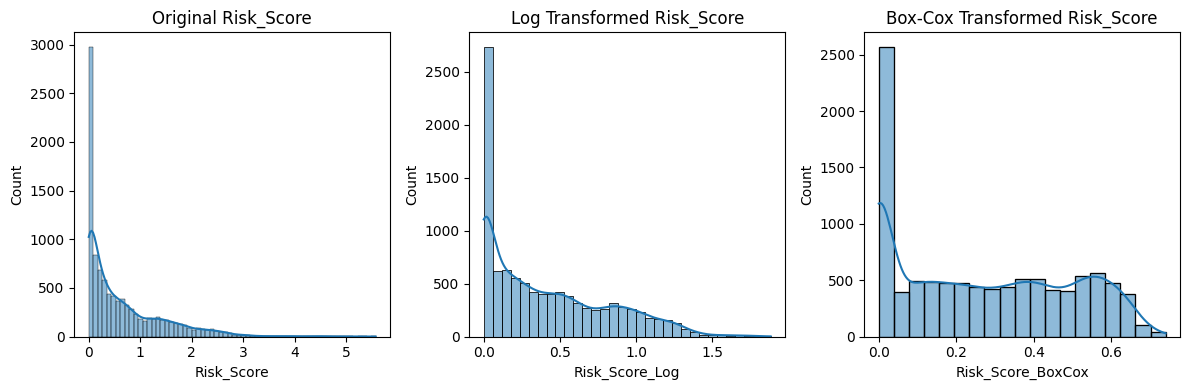

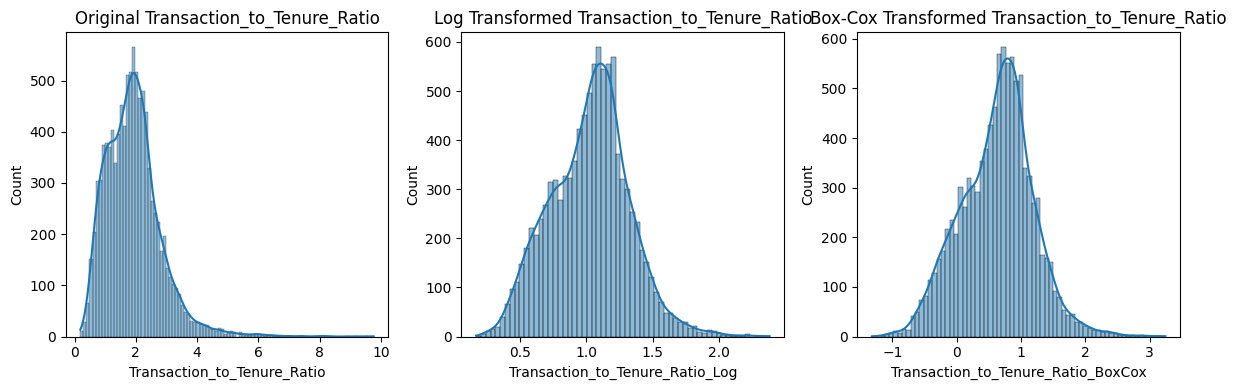

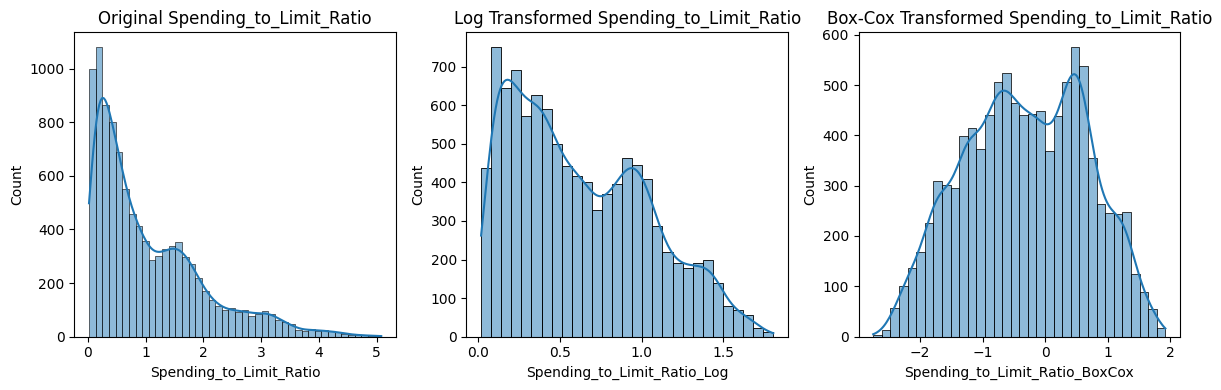

In [25]:
# Visualize the transformations
for feature in high_skew_feature_names:
    plt.figure(figsize=(12, 4))

    # Original Distribution
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Original {feature}')

    # Log Transformed Distribution
    plt.subplot(1, 3, 2)
    sns.histplot(df[feature + '_Log'], kde=True)
    plt.title(f'Log Transformed {feature}')

    # Box-Cox Transformed Distribution
    plt.subplot(1, 3, 3)
    sns.histplot(df[feature + '_BoxCox'], kde=True)
    plt.title(f'Box-Cox Transformed {feature}')

    plt.tight_layout()
    plt.show()

In [26]:
df.head(3)

,Attrition_Flag,Customer_Age,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Spending_Change_Ratio_Log,Spending_Change_Ratio_BoxCox,Loyalty_Score_Log,Loyalty_Score_BoxCox,Risk_Score_Log,Risk_Score_BoxCox,Transaction_to_Tenure_Ratio_Log,Transaction_to_Tenure_Ratio_BoxCox,Spending_to_Limit_Ratio_Log,Spending_to_Limit_Ratio_BoxCox
0,Existing Customer,45,3,2,39,5,1,3,12691.0,777,...,0.001166,0.000285,6.709304,11.010951,0.059423,0.057335,0.730888,0.074918,0.086309,-1.906000
1,Existing Customer,49,2,4,44,6,1,2,8256.0,864,...,0.001193,0.000286,6.588926,10.710695,0.099530,0.093763,0.559616,-0.275898,0.145287,-1.547577
2,Existing Customer,51,2,3,36,4,1,0,3418.0,0,...,0.001374,0.000288,5.888878,9.058606,0.000000,0.000000,0.441833,-0.539985,0.439594,-0.559823


In [27]:
# 1. Create a list of the _Log columns to drop
log_columns_to_drop = [feature + '_Log' for feature in high_skew_feature_names]

# 2. Drop the _Log columns
df = df.drop(columns=log_columns_to_drop, errors='ignore')

# The DataFrame 'df' now contains only the original features and the Box-Cox transformed versions.

# Verification (optional):
print(df.columns) # See the remaining columns

Index(['Attrition_Flag', 'Customer_Age', 'Education_Level', 'Income_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Account_Tenure_Years', 'Activity_Ratio', 'Inactivity_Ratio',
       'Contact_Frequency', 'Credit_Utilization_Percentage',
       'Unused_Credit_Percentage', 'Revolving_Balance_Ratio',
       'Avg_Transaction_Amt', 'Transaction_Change_Ratio',
       'Spending_Change_Ratio', 'Dependent_Ratio', 'Loyalty_Score',
       'Risk_Score', 'Transaction_to_Tenure_Ratio', 'Spending_to_Limit_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver',
       'Dependent_count_1', 'Dependent_count_2', 'Dependent_count_3',
       'Depen

In [28]:

# 1. Identify Box-Cox Transformed Features:
boxcox_features = [col for col in df.columns if col.endswith('_BoxCox')]

# 2. Identify Original Features to Remove:
original_features_to_remove = [col.replace('_BoxCox', '') for col in boxcox_features]

# 3. Create Filtered DataFrame:
final_df = df.drop(columns=original_features_to_remove, errors='ignore')

# Verification:
print(final_df.columns)

Index(['Attrition_Flag', 'Customer_Age', 'Education_Level', 'Months_on_book',
       'Total_Relationship_Count', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Total_Trans_Ct', 'Account_Tenure_Years',
       'Dependent_Ratio', 'Gender_M', 'Marital_Status_Married',
       'Marital_Status_Single', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver', 'Dependent_count_1', 'Dependent_count_2',
       'Dependent_count_3', 'Dependent_count_4', 'Dependent_count_5',
       'Age_Group_30-40', 'Age_Group_40-50', 'Age_Group_50-60',
       'Age_Group_60+', 'Income_Category_BoxCox',
       'Months_Inactive_12_mon_BoxCox', 'Credit_Limit_BoxCox',
       'Avg_Open_To_Buy_BoxCox', 'Total_Amt_Chng_Q4_Q1_BoxCox',
       'Total_Trans_Amt_BoxCox', 'Total_Ct_Chng_Q4_Q1_BoxCox',
       'Avg_Utilization_Ratio_BoxCox', 'Activity_Ratio_BoxCox',
       'Inactivity_Ratio_BoxCox', 'Contact_Frequency_BoxCox',
       'Credit_Utilization_Percentage_BoxCox',
       'Unused_Credit_Perc

In [29]:
final_df.head(3)

,Attrition_Flag,Customer_Age,Education_Level,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Account_Tenure_Years,Dependent_Ratio,...,Credit_Utilization_Percentage_BoxCox,Unused_Credit_Percentage_BoxCox,Revolving_Balance_Ratio_BoxCox,Avg_Transaction_Amt_BoxCox,Transaction_Change_Ratio_BoxCox,Spending_Change_Ratio_BoxCox,Loyalty_Score_BoxCox,Risk_Score_BoxCox,Transaction_to_Tenure_Ratio_BoxCox,Spending_to_Limit_Ratio_BoxCox
0,Existing Customer,45,3,39,5,3,777,42,3.250000,0.066667,...,0.056201,-0.060191,0.060191,1.116907,0.009358,0.000285,11.010951,0.057335,0.074918,-1.906000
1,Existing Customer,49,2,44,6,2,864,33,3.666667,0.102041,...,0.090710,-0.101611,0.101611,1.136391,0.009535,0.000286,10.710695,0.093763,-0.275898,-1.547577
2,Existing Customer,51,2,36,4,0,0,20,3.000000,0.058824,...,0.000000,0.000000,0.000000,1.165050,0.009535,0.000288,9.058606,0.000000,-0.539985,-0.559823


## Step 8: Encode Feature Variable and Feature Selection


In [30]:
# Lable encode feature Variable
label_encoder = LabelEncoder()
final_df['Attrition_Flag'] = label_encoder.fit_transform(final_df['Attrition_Flag'])
final_df.head(3) # Now 'Attrition_Flag' will be 0 and 1

,Attrition_Flag,Customer_Age,Education_Level,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Account_Tenure_Years,Dependent_Ratio,...,Credit_Utilization_Percentage_BoxCox,Unused_Credit_Percentage_BoxCox,Revolving_Balance_Ratio_BoxCox,Avg_Transaction_Amt_BoxCox,Transaction_Change_Ratio_BoxCox,Spending_Change_Ratio_BoxCox,Loyalty_Score_BoxCox,Risk_Score_BoxCox,Transaction_to_Tenure_Ratio_BoxCox,Spending_to_Limit_Ratio_BoxCox
0,1,45,3,39,5,3,777,42,3.250000,0.066667,...,0.056201,-0.060191,0.060191,1.116907,0.009358,0.000285,11.010951,0.057335,0.074918,-1.906000
1,1,49,2,44,6,2,864,33,3.666667,0.102041,...,0.090710,-0.101611,0.101611,1.136391,0.009535,0.000286,10.710695,0.093763,-0.275898,-1.547577
2,1,51,2,36,4,0,0,20,3.000000,0.058824,...,0.000000,0.000000,0.000000,1.165050,0.009535,0.000288,9.058606,0.000000,-0.539985,-0.559823


In [31]:
# Grouping columns by data types
grouped = {}
for dtype in final_df.dtypes.unique():
    grouped[str(dtype)] = final_df.select_dtypes(include=[dtype]).columns.tolist()

# Print grouped columns
print(grouped)

{'int64': ['Attrition_Flag', 'Customer_Age', 'Education_Level', 'Months_on_book', 'Total_Relationship_Count', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Ct'], 'float64': ['Account_Tenure_Years', 'Dependent_Ratio', 'Income_Category_BoxCox', 'Months_Inactive_12_mon_BoxCox', 'Credit_Limit_BoxCox', 'Avg_Open_To_Buy_BoxCox', 'Total_Amt_Chng_Q4_Q1_BoxCox', 'Total_Trans_Amt_BoxCox', 'Total_Ct_Chng_Q4_Q1_BoxCox', 'Avg_Utilization_Ratio_BoxCox', 'Activity_Ratio_BoxCox', 'Inactivity_Ratio_BoxCox', 'Contact_Frequency_BoxCox', 'Credit_Utilization_Percentage_BoxCox', 'Unused_Credit_Percentage_BoxCox', 'Revolving_Balance_Ratio_BoxCox', 'Avg_Transaction_Amt_BoxCox', 'Transaction_Change_Ratio_BoxCox', 'Spending_Change_Ratio_BoxCox', 'Loyalty_Score_BoxCox', 'Risk_Score_BoxCox', 'Transaction_to_Tenure_Ratio_BoxCox', 'Spending_to_Limit_Ratio_BoxCox'], 'bool': ['Gender_M', 'Marital_Status_Married', 'Marital_Status_Single', 'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Si

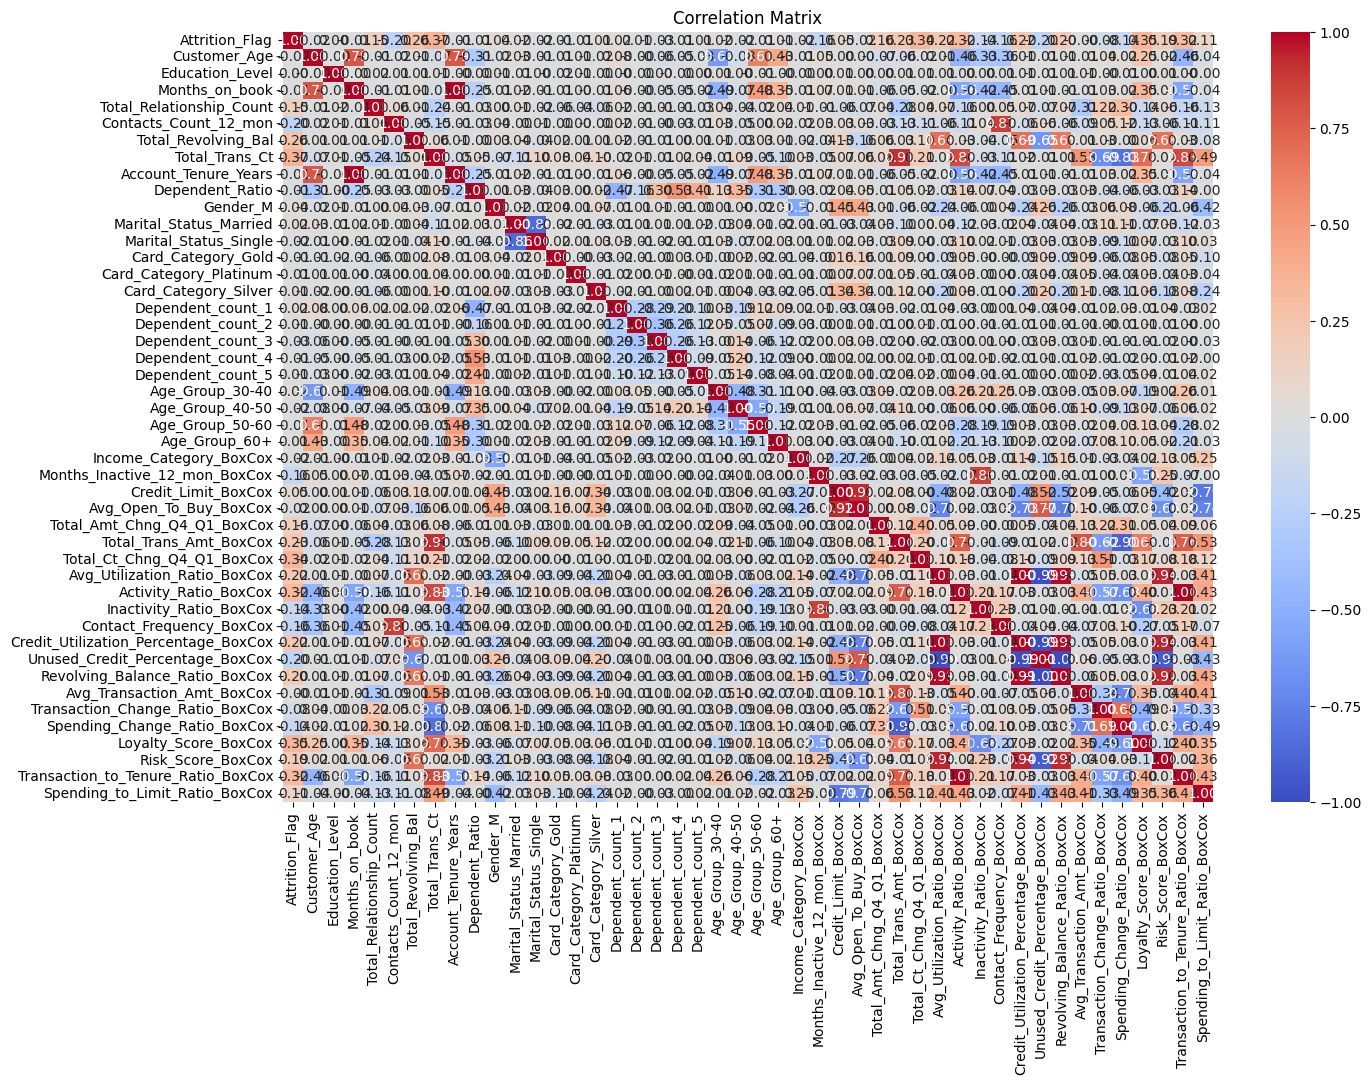

In [32]:
# Feature Selection: Correlation Matrix
correlation_matrix = final_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [38]:
# Define a threshold for important correlations
threshold = 0.2  

# Get correlations with the target variable
target_correlations = correlation_matrix['Attrition_Flag'].sort_values(ascending=False)

# Filter correlations based on threshold
important_correlations = target_correlations[abs(target_correlations) > threshold]

# Print only important correlations
print(important_correlations)

Attrition_Flag                          1.000000
Total_Trans_Ct                          0.371403
Loyalty_Score_BoxCox                    0.350612
Total_Ct_Chng_Q4_Q1_BoxCox              0.344669
Transaction_to_Tenure_Ratio_BoxCox      0.316554
Activity_Ratio_BoxCox                   0.316554
Total_Revolving_Bal                     0.263053
Total_Trans_Amt_BoxCox                  0.232896
Avg_Utilization_Ratio_BoxCox            0.222856
Credit_Utilization_Percentage_BoxCox    0.222847
Contacts_Count_12_mon                  -0.204491
Name: Attrition_Flag, dtype: float64


In [39]:
# Feature Selection: Tree-Based Feature Importance
from sklearn.ensemble import RandomForestClassifier

# Sample Data
X = final_df.drop(columns=['Attrition_Flag'])  # Features
y = final_df['Attrition_Flag']  # Target

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Select important features (threshold can be adjusted)
important_features = feature_importances[feature_importances > 0.01].sort_values(ascending=False)

# Print important features
print(important_features)

Total_Trans_Amt_BoxCox                  0.095792
Total_Trans_Ct                          0.084318
Spending_Change_Ratio_BoxCox            0.073682
Total_Revolving_Bal                     0.070627
Total_Ct_Chng_Q4_Q1_BoxCox              0.064997
Loyalty_Score_BoxCox                    0.058930
Avg_Transaction_Amt_BoxCox              0.051998
Activity_Ratio_BoxCox                   0.048606
Transaction_to_Tenure_Ratio_BoxCox      0.047300
Total_Relationship_Count                0.042917
Transaction_Change_Ratio_BoxCox         0.035947
Total_Amt_Chng_Q4_Q1_BoxCox             0.031039
Inactivity_Ratio_BoxCox                 0.026993
Credit_Utilization_Percentage_BoxCox    0.023905
Risk_Score_BoxCox                       0.022638
Unused_Credit_Percentage_BoxCox         0.020994
Spending_to_Limit_Ratio_BoxCox          0.020841
Avg_Utilization_Ratio_BoxCox            0.019169
Revolving_Balance_Ratio_BoxCox          0.018863
Credit_Limit_BoxCox                     0.015198
Avg_Open_To_Buy_BoxC

In [35]:
# Feature Selection: Uni-variate selection

In [ ]:
# Feature Selection: Recursive Feature Elimination
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Define features (X) and target (y)
X = final_df.drop(columns=['Attrition_Flag'])  # Feature set
y = final_df['Attrition_Flag']  # Target variable

# Initialize the model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with the model and desired number of features to select
num_features_to_select = 10  # Adjust as needed
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit RFE to the data
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Total_Relationship_Count', 'Total_Revolving_Bal', 'Total_Trans_Ct',
       'Total_Trans_Amt_BoxCox', 'Total_Ct_Chng_Q4_Q1_BoxCox',
       'Activity_Ratio_BoxCox', 'Avg_Transaction_Amt_BoxCox',
       'Transaction_Change_Ratio_BoxCox', 'Spending_Change_Ratio_BoxCox',
       'Loyalty_Score_BoxCox'],
      dtype='object')


## Step 9: Training the model

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define the final feature set (intersection of all three methods)
selected_features = [
    'Total_Trans_Amt_BoxCox',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1_BoxCox',
    'Loyalty_Score_BoxCox',
    'Total_Revolving_Bal',
    'Activity_Ratio_BoxCox'
]

# Create X (features) and y (target)
X = final_df[selected_features]
y = final_df['Attrition_Flag']  # Target variable

# Split data into training & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 95.21%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.84       325
           1       0.96      0.98      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.92      0.89      0.91      2026
weighted avg       0.95      0.95      0.95      2026

